Notebook to plot cape from MPAS output, processed by mpas_cape.ipynb.

James Ruppert  
10/2/2025

### Main settings

In [6]:
import numpy as np
import pickle
import zarr
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib import colors
import cartopy.crs as ccrs

In [2]:
pclass_names = ['DC', 'CG', 'SC', 'ST', 'AN', 'DSA']
nclass = len(pclass_names)
exp_names = ["CTL", "HOMO_RAD", "CLIM_RAD"]
expName=exp_names[0]

pickle_dir = f"/glade/campaign/univ/uokl0049/jruppert/pickle_out"
# pickle_dir = f"../../../pickle_out/aquaplanet"

# Get list of desired file times
file_times_arr = np.arange('2000-05-01T06:00:00', '2000-05-11T06:00:00', 6, dtype='datetime64[h]')
file_times = [file_times_arr[i].astype('datetime64[D]').astype(str)+'_'+str(file_times_arr[i]).split('T')[1].split(':')[0]+'.00.00' for i in range(len(file_times_arr))]
ntimes = len(file_times)

### Read/Write variable from MPAS output

In [3]:
# Read grid data
grid_pickle_file = f"{pickle_dir}/grid_data.pickle"
with open(grid_pickle_file, 'rb') as f:
    areaCell, latCell, lonCell = pickle.load(f)

#### Time loop

In [4]:
# Possible looping over time

# if do_write:

model_path = "/glade/campaign/mmm/dpm/rberrios/glade_scratch/MPAS_APE/aqua_sstmax10N_ASD/"

for expName in exp_names[0:1]:

    writeout_path = f"/glade/derecho/scratch/ruppert/tc-crfrad/mpas/{expName}"

    # for it in range(ntimes):
    for it in range(18,19):

        time = file_times[it]

        out_path = f"{writeout_path}/CAPE_{time}.zarr"

        # Read in from Zarr
        root = zarr.open(out_path, mode="r")
        cape = root["CAPE"][:]  # numpy array
        cin  = root["CIN"][:]

### Plot CAPE

In [5]:
ll_bounds = (0,60,0,30)
filter = np.where((lonCell >= ll_bounds[0]) &
                  (lonCell <= ll_bounds[1]) &
                  (latCell >= ll_bounds[2]) &
                  (latCell <= ll_bounds[3]))[0]

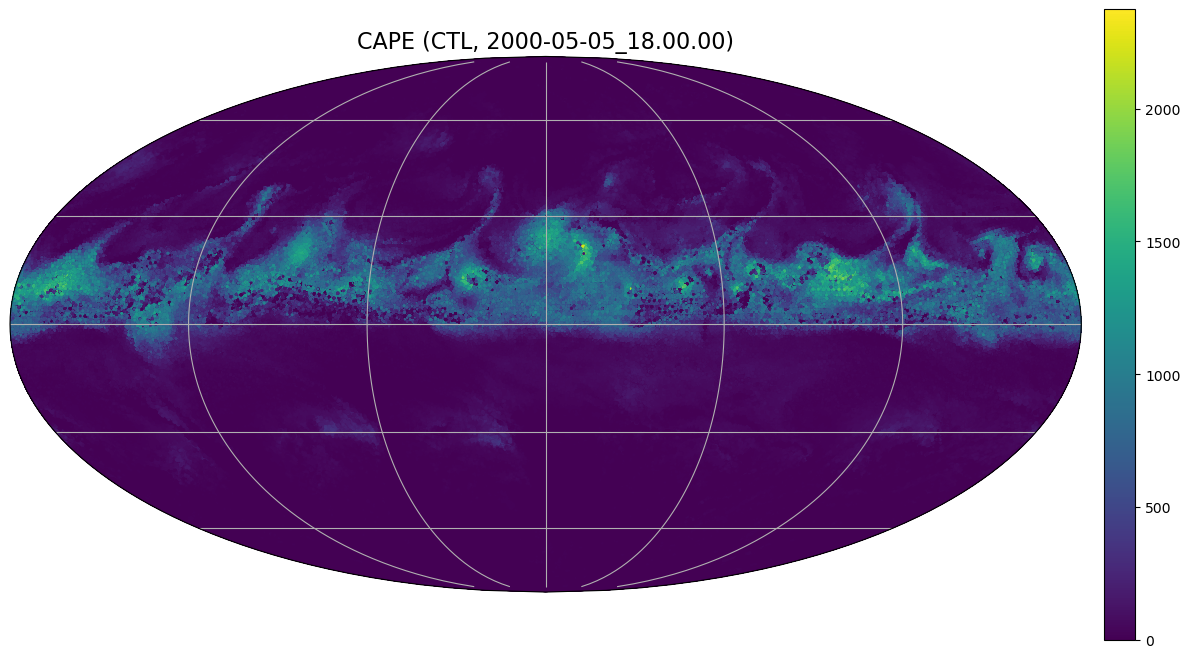

In [7]:
sns.set_palette('muted')

# for it, itime in enumerate(file_times_read):

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection=ccrs.Mollweide())
ax.gridlines()#draw_labels=True, x_inline=False, y_inline=False)#, dms=True)

sc = ax.scatter(lonCell, latCell, c=cape, s=1, transform=ccrs.PlateCarree())

cbar=plt.colorbar(sc, ax=ax, fraction=0.03, pad=0.02, shrink=0.65)
ax.set_title(f"CAPE ({expName}, {time})", fontsize=16)
# plt.ylim((-5,25))

plt.tight_layout()
plt.show()
# plt.savefig(f"cape_map_{expName}_{time}.png", dpi=200)